# Definitive Guide to Hierarchical Clustering with Python and Scikit-Learn

> In this guide, we will focus on implementing the **Hierarchical Clustering Algorithm with Scikit-Learn** to solve a marketing problem.

After reading the guide, you will understand:

- When to apply Hierarchical Clustering.
- How to visualize the dataset to understand if it is fit for clustering.
- How to pre-process features and engineer new features based on the dataset.
- How to reduce the dimensionality of the dataset using PCA.
- How to use and read a Dendrogram to separate groups.
- What are the different linking methods and distance metrics applied to Dendrograms and clustering algorithms.
- What are the agglomerative and divisive clustering strategies and how they work.
- How to implement the Agglomerative Hierarchical Clustering with Scikit-Learn.
- What are the most frequent problems when dealing with clustering algorithms and how to solve them.

### Brief Exploratory Data Analysis

In [2]:
import pandas as pd

# Substitute the path_to_file content by the path to your shopping-data.csv file
path_to_file = 'hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv'
customer_data = pd.read_csv(path_to_file)

In [7]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

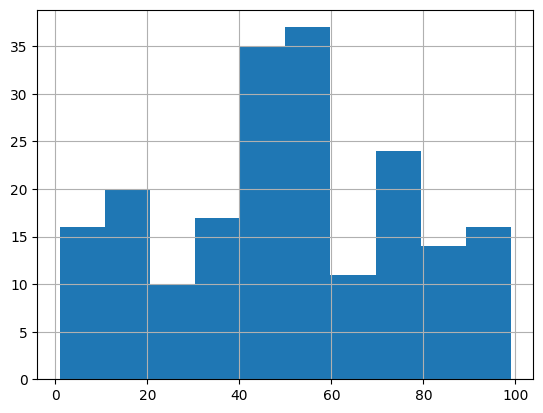

In [5]:
customer_data['Spending Score (1-100)'].hist();

In [6]:
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


<Axes: >

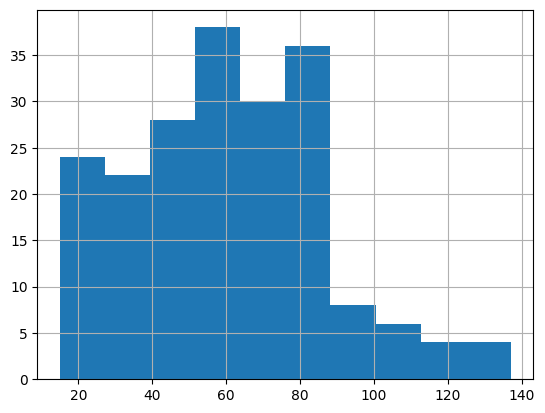

In [8]:
customer_data['Annual Income (k$)'].hist()

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
customer_data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
customer_data['Genre'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

### Encoding Variables and Feature Engineering

In [13]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
customer_data['Age Groups']

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] <
                                         (60, 70]]

In [14]:
customer_data.groupby('Age Groups')['Age Groups'].count()

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

In [16]:
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age Groups
0,1,Male,19,15,39,"(15, 20]"
1,2,Male,21,15,81,"(20, 30]"
2,3,Female,20,16,6,"(15, 20]"
3,4,Female,23,16,77,"(20, 30]"
4,5,Female,31,17,40,"(30, 40]"
...,...,...,...,...,...,...
195,196,Female,35,120,79,"(30, 40]"
196,197,Female,45,126,28,"(40, 50]"
197,198,Male,32,126,74,"(30, 40]"
198,199,Male,32,137,18,"(30, 40]"


In [15]:
# The _oh means one hot
customer_data_oh = pd.get_dummies(customer_data)
# Display the one hot encoded dataframe
customer_data_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,0,1,1,0,0,0,0,0
1,2,21,15,81,0,1,0,1,0,0,0,0
2,3,20,16,6,1,0,1,0,0,0,0,0
3,4,23,16,77,1,0,0,1,0,0,0,0
4,5,31,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,0,0,1,0,0,0
196,197,45,126,28,1,0,0,0,0,1,0,0
197,198,32,126,74,0,1,0,0,1,0,0,0
198,199,32,137,18,0,1,0,0,1,0,0,0


### Basic Plotting and Dimensionality Reduction

#### Plotting Each Pair of Data

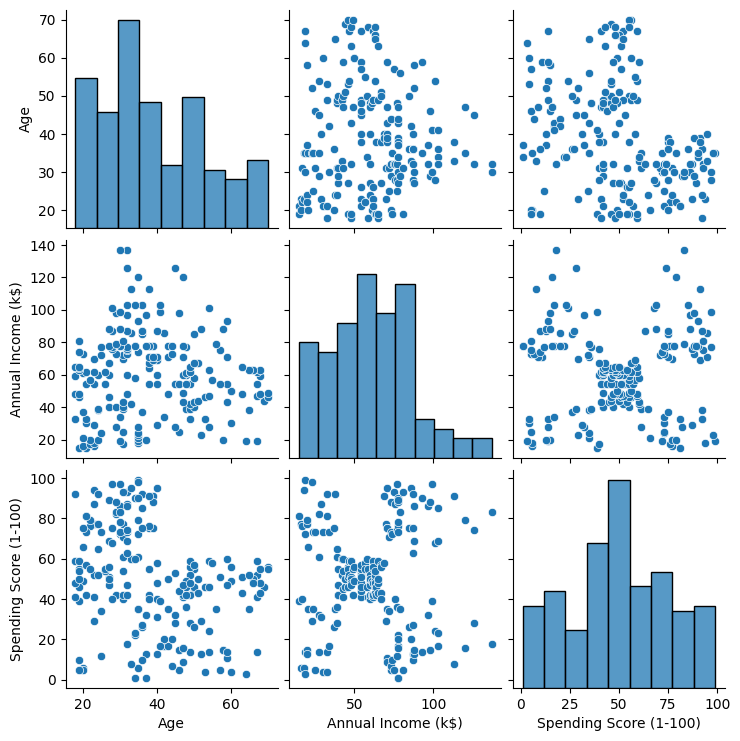

In [17]:
import seaborn as sns

# Dropping CustomerID column from data
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data)

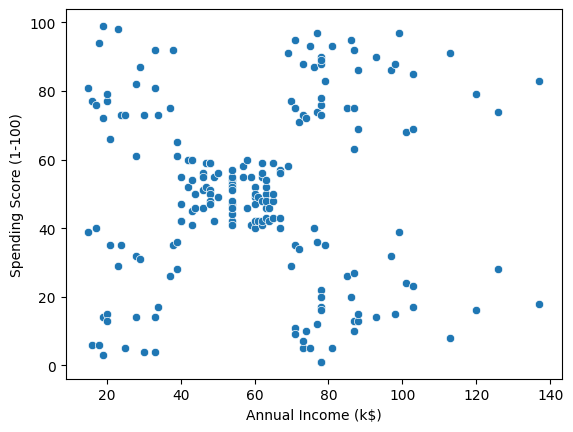

In [18]:
sns.scatterplot(x=customer_data['Annual Income (k$)'], y=customer_data['Spending Score (1-100)']);

#### Plotting Data After Using PCA

In [19]:
customer_data_oh = customer_data_oh.drop(['Age'], axis=1)
customer_data_oh.shape

(200, 11)

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit_transform(customer_data_oh)
pca.explained_variance_ratio_.cumsum()

array([0.85268543, 0.99431178, 0.99973942, 0.99984572, 0.99990085,
       0.99993646, 0.99996214, 0.99998194, 1.        , 1.        ])

<Axes: >

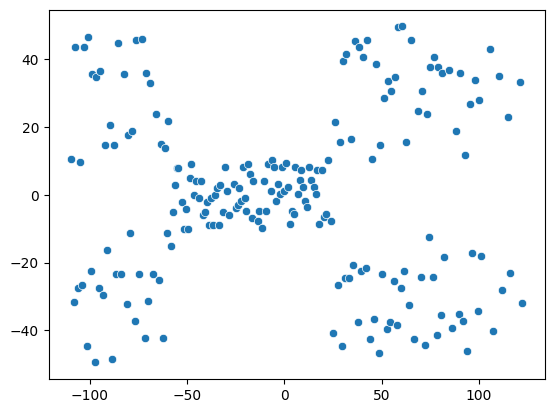

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(customer_data_oh)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

### Visualizing Hierarchical Structure with Dendrograms

#### Steps to Perform Agglomerative Hierarchical Clustering

In [23]:
customer_data_oh

,CustomerID,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,15,39,0,1,1,0,0,0,0,0
1,2,15,81,0,1,0,1,0,0,0,0
2,3,16,6,1,0,1,0,0,0,0,0
3,4,16,77,1,0,0,1,0,0,0,0
4,5,17,40,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,120,79,1,0,0,0,1,0,0,0
196,197,126,28,1,0,0,0,0,1,0,0
197,198,126,74,0,1,0,0,1,0,0,0
198,199,137,18,0,1,0,0,1,0,0,0


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [75.0, 75.0, 101.25, 101.25],
  [60.0, 60.0, 88.125, 88.125],
  [17.5, 17.5, 74.0625, 74.0625],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [142.5, 142.5, 181.25, 181.25],
  [45.78125, 45.78125, 161.875, 161.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [282.5, 282.5, 312.5, 312.5],
  [237.5, 237.5, 297.5, 297.5],
  [335.0, 33

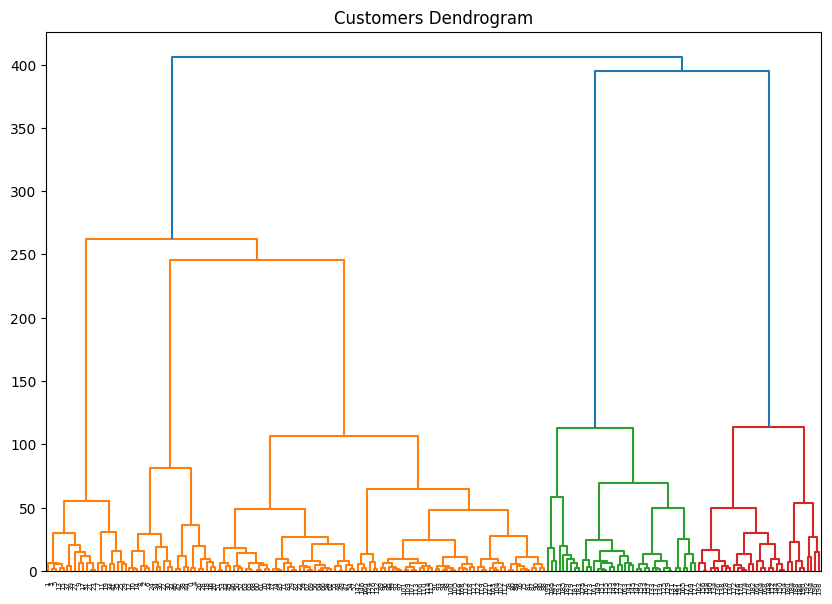

In [24]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)

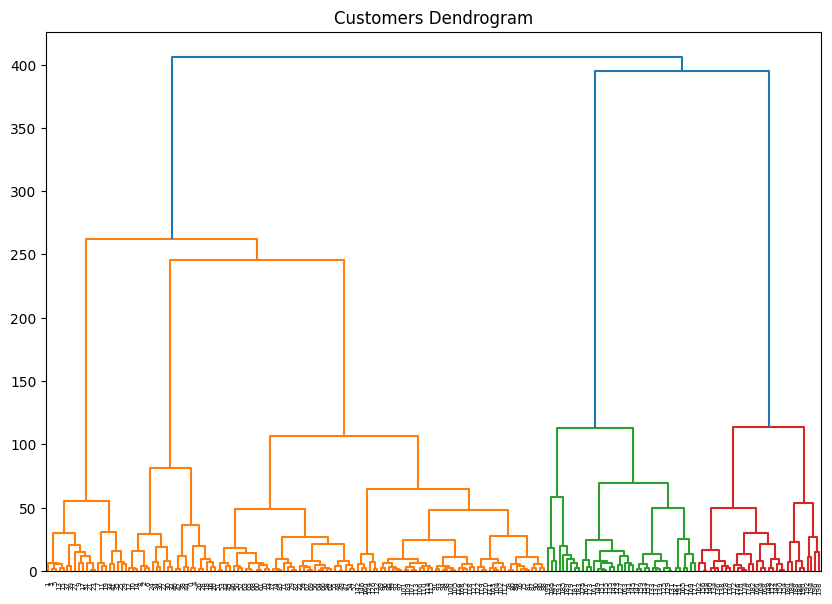

In [26]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

#### Distance Metrics

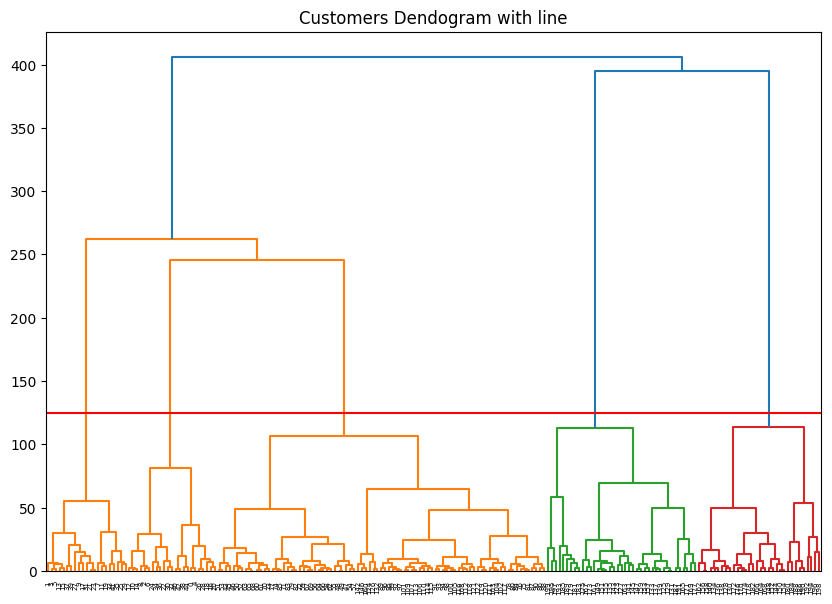

In [25]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendogram with line")
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')

### Implementing an Agglomerative Hierarchical Clustering
#### Using Original Data

In [27]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Text(0.5, 1.0, 'Labeled Customer Data')

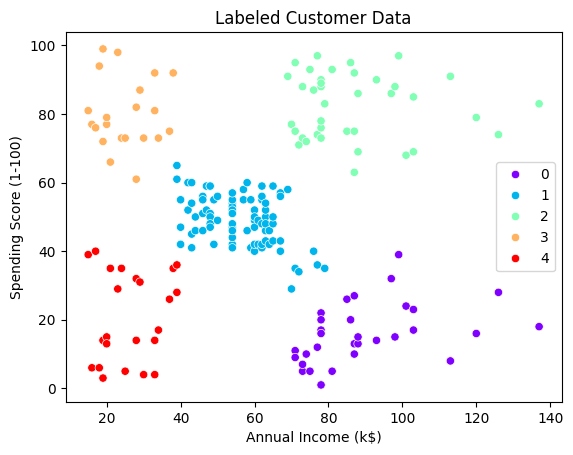

In [28]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data,
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')

#### Using the Result from PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0.5, 1.0, 'Labeled Customer Data Reduced with PCA')

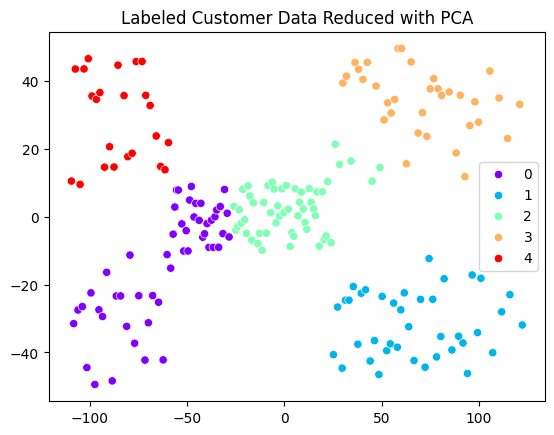

In [29]:
clustering_model_pca = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model_pca.fit(pcs)

data_labels_pca = clustering_model_pca.labels_

sns.scatterplot(x=pc1_values,
                y=pc2_values,
                hue=data_labels_pca,
                palette="rainbow").set_title('Labeled Customer Data Reduced with PCA')

***Notes:*** If you have a very large and complex dataset in which you must perform a dimensionality reduction prior to clustering - try to analyze the linear relationships between each of the features and their residuals to back up the use of PCA and enhance the explicability of the process. By making a linear model per pair of features, you will be able to understand how the features interact.

If the data volume is so large, it becomes impossible to plot the pairs of features, select a sample of your data, as balanced and close to the normal distribution as possible and perform the analysis on the sample first, understand it, fine-tune it - and apply it later to the whole dataset.

You can always choose different clustering visualization techniques according to the nature of your data (linear, non-linear) and combine or test all of them if necessary.